In [8]:
%matplotlib inline
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import *

## Introduction
With Spik3 the goal is to find a 3 qubit Quantum Circuit that has 3 outcomes with 1/3 probability each.

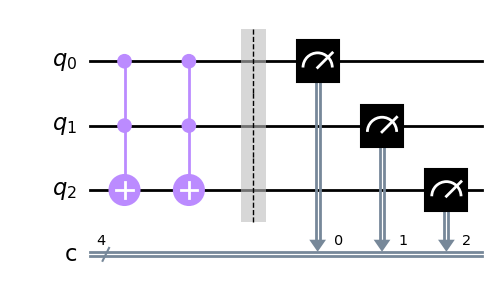

In [15]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ1 = QuantumCircuit(3,3)
circ2 = QuantumCircuit(3,3)
circ3 = QuantumCircuit(3,4)
circ4 = QuantumCircuit(3,3)

# spike1 solution
circ1.barrier(range(3))
circ1.measure(range(3),range(3))
circ1 = measure

# spike2 solution
circ2.h(0)
circ2.barrier(range(3))
circ2.measure(range(3),range(3))

# spike3 solution: https://qiskit.org/textbook/ch-states/representing-qubit-states.html
circ3.ccx(0,1,2)
circ3.ccx(0,1,2)
circ3.barrier(range(3))
circ3.measure(range(3),range(3))

# spike4 solution
circ4.h(2)
circ4.cx(2, 1)
circ4.h(0)
circ4.barrier(range(3))
circ4.measure(range(3),range(3))

#circ1.draw(output='mpl')
#circ2.draw(output='mpl')
circ3.draw(output='mpl')
#circ4.draw(output='mpl')


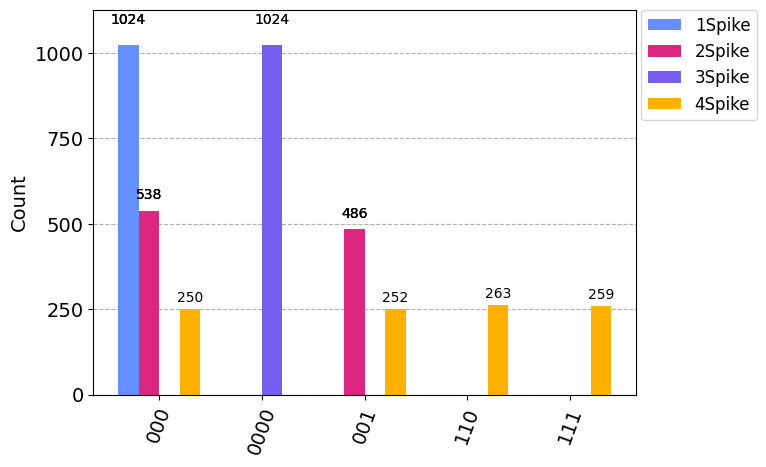

In [16]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job1 = execute(circ1, backend_sim, shots=1024)
job2 = execute(circ2, backend_sim, shots=1024)
job3 = execute(circ3, backend_sim, shots=1024)
job4 = execute(circ4, backend_sim, shots=1024)

# Grab the results from the job.
result1 = job1.result()
counts1 = result1.get_counts(circ1)
#print(counts1)
#plot_histogram(counts)

result2 = job2.result()
counts2 = result2.get_counts(circ2)
#print(counts2)
#plot_histogram(counts)

result3 = job3.result()
counts3 = result3.get_counts(circ3)
#print(counts3)
#plot_histogram(counts)

result4 = job4.result()
counts4 = result4.get_counts(circ4)
#print(counts4)
#plot_histogram(counts)

plot_histogram([counts1, counts2, counts3, counts4], legend=['1Spike', '2Spike', '3Spike', '4Spike'])